In [1]:
import csv
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
def get_max_throughputs(policy):
    throughputs = defaultdict(float)
    with open('/home/stephanie/ray-fork/results/results-499f775b1351cb7760ab2a12caf167a3fbad8f96/{}.csv'.format(policy), 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            num_shards = float(row['num_shards'])
            throughput = float(row['throughput'])
            if throughput == -1:
                continue
            if row['lineage'] == 'True' or row['queue'] == 'True' or row['timed_out'] == 'True':
                continue
            if throughput > throughputs[num_shards]:
                throughputs[num_shards] = throughput
    throughputs = list(throughputs.items())
    throughputs.sort(key=lambda x: x[0])
    return zip(*throughputs)

In [11]:
lcx, lcy = get_max_throughputs('lineage-cache-100')
lcfx, lcfy = get_max_throughputs('lineage-cache-flush-100')
lckfx, lckfy = get_max_throughputs('lineage-cache-k-flush-100')
gcsx, gcsy = get_max_throughputs('gcs')
print(gcsx, gcsy)

(1.0, 2.0, 4.0, 8.0, 16.0, 24.0, 32.0, 48.0, 64.0) (115617.47698460297, 123284.1921003944, 182032.98407758045, 213869.4080600076, 216493.99916734823, 219497.50353078215, 223625.1172306674, 222973.43855245813, 225212.37196629113)


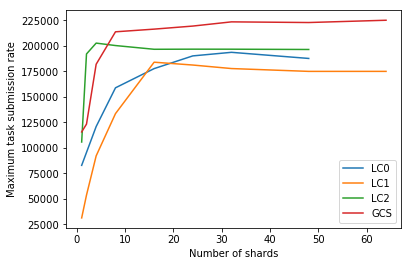

In [16]:
l1, = plt.plot(lcx, lcy, label="Lineage cache, in order")
l2, = plt.plot(lcfx, lcfy, label="Lineage cache, flush immediately")
l3, = plt.plot(lckfx, lckfy, label="Lineage cache, commit k")
gcs, = plt.plot(gcsx, gcsy, label="GCS")
# plt.xlim(0, 32)

plt.legend([l1, l2, l3, gcs], ['LC0', 'LC1', 'LC2', 'GCS'])
plt.xlabel("Number of shards")
plt.ylabel("Maximum task submission rate")
plt.show()
# plt.savefig("throughput.pdf")